<a href="https://colab.research.google.com/github/lazy-wolf/python-class-notes/blob/main/HuggingFace_Dataset_Model_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment 2**

```
# Authoured by: Wasim Dawood Shaik
# UNB ID: 3744476
# Date: 05-10-2023
```

**Delivarable_1 : Create your own separate python notebooks in Colab for each of the three sources.**

**Creating separate python notebooks in Colab for using pre-trained models and dataset from HuggingFace**

**Import Libraries**

In [ ]:
from google.colab import drive
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_hub as hub
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,ConfusionMatrixDisplay,classification_report

In [ ]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


**Dataset Info**

[beans datset link](https://huggingface.co/datasets/beans)

*https://huggingface.co/datasets/beans*

**Importing Dataset from HuggingFace Datasets from Google Drive**

**Data Preprocessing and Data Analysis**

In [ ]:
train_directory="/content/drive/MyDrive/TME_6015/Assignment_2/Beans/train"
batch_size = 32
img_height = 128
img_width = 128
train_data = tf.keras.utils.image_dataset_from_directory(train_directory,
                                                         validation_split=None,
                                                         seed=123,
                                                         image_size=(img_height, img_width),
                                                         batch_size=batch_size)

Found 1034 files belonging to 3 classes.


In [ ]:
train_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
class_names =train_data.class_names
print(class_names)

['angular_leaf_spot', 'bean_rust', 'healthy']


In [ ]:
validation_directory="/content/drive/MyDrive/TME_6015/Assignment_2/Beans/validation"
batch_size = 32
img_height = 128
img_width = 128
validation_data = tf.keras.utils.image_dataset_from_directory(validation_directory,
                                                         validation_split=None,
                                                         seed=123,
                                                         image_size=(img_height, img_width),
                                                         batch_size=batch_size)

Found 133 files belonging to 3 classes.


In [ ]:
validation_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
test_directory="/content/drive/MyDrive/TME_6015/Assignment_2/Beans/test"
batch_size = 32
img_height = 128
img_width = 128
test_data = tf.keras.utils.image_dataset_from_directory(test_directory,
                                                         validation_split=None,
                                                         seed=123,
                                                         image_size=(img_height, img_width),
                                                         batch_size=batch_size)

Found 128 files belonging to 3 classes.


In [ ]:
test_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

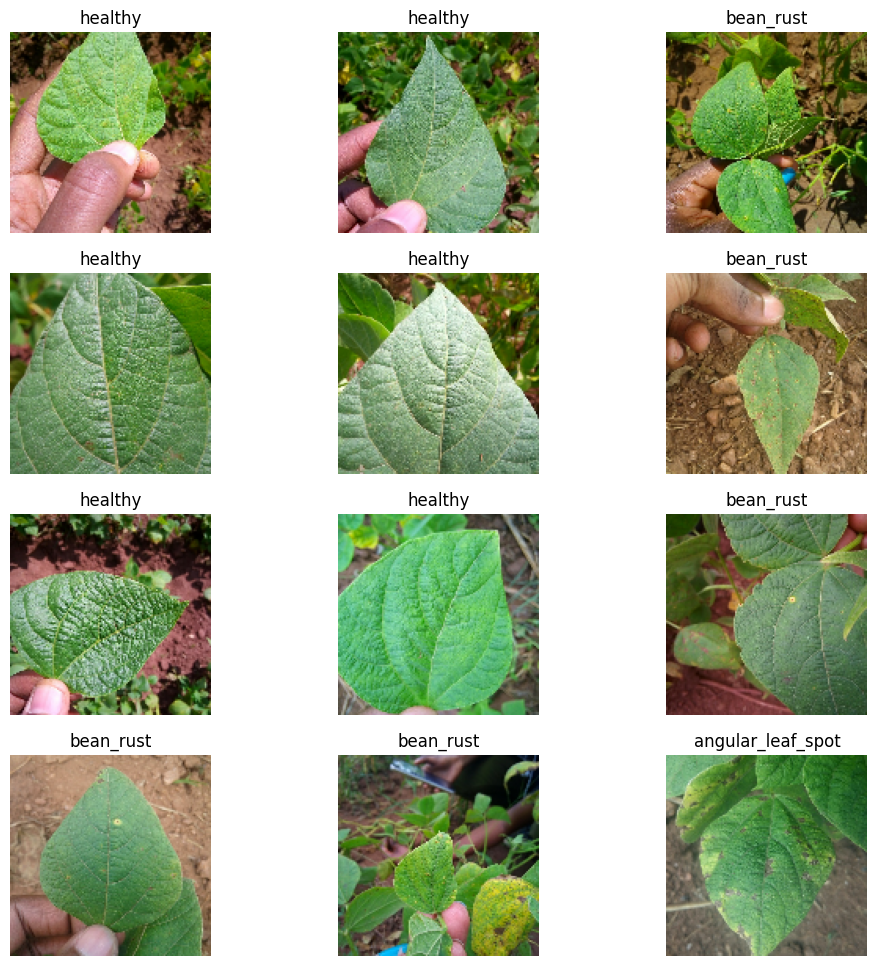

In [ ]:
plt.figure(figsize=(12, 12))
for images, labels in train_data.take(1):
    for i in range(12):
        ax = plt.subplot(4, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

**Deliverable_4 : Choose one of the above examples (i.e. Tensorflow or Huggingface or Kaggle) and implement a 2 different models on the same test set**

**Model - 1**

**Create a Model**

In [ ]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [ ]:
model_handle = "https://www.kaggle.com/models/google/mobilenet-v2/frameworks/TensorFlow2/variations/035-128-classification/versions/2"

feature_extractor = hub.KerasLayer(model_handle,
                                   trainable=True)
num_class = 3
model = tf.keras.Sequential(
    [
        normalization_layer,
        feature_extractor,
        tf.keras.layers.Dense(num_class, activation="softmax")
    ]
)
model.build([None, 128, 128, 3])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 keras_layer (KerasLayer)    (None, 1001)              1692489   
                                                                 
 dense (Dense)               (None, 3)                 3006      
                                                                 
Total params: 1695495 (6.47 MB)
Trainable params: 1681415 (6.41 MB)
Non-trainable params: 14080 (55.00 KB)
_________________________________________________________________


**Compile and Train the Model**

In [ ]:
# Compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"]
             )





In [ ]:
# Callbacks--> Stop training automatically once the model performance stop improving
learning_rate_reduction=tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",patience=2,factor=0.5, min_lr=0.00001,verbose =1)
Early_Stopping= tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=5, restore_best_weights=True)

In [ ]:

# Fit the model
history1= model.fit(train_data, epochs=20, validation_data= validation_data,callbacks=[Early_Stopping,learning_rate_reduction], verbose=1)

Epoch 1/20
33/33 [==============================] - 30s 453ms/step - loss: 1.8453 - accuracy: 0.7128 - val_loss: 4.6488 - val_accuracy: 0.6165 - lr: 0.0010
Epoch 2/20
33/33 [==============================] - 15s 436ms/step - loss: 0.5485 - accuracy: 0.8994 - val_loss: 0.7193 - val_accuracy: 0.9098 - lr: 0.0010
Epoch 3/20
33/33 [==============================] - 16s 453ms/step - loss: 0.2731 - accuracy: 0.9536 - val_loss: 0.5902 - val_accuracy: 0.9474 - lr: 0.0010
Epoch 4/20
33/33 [==============================] - 15s 437ms/step - loss: 0.2175 - accuracy: 0.9652 - val_loss: 0.9493 - val_accuracy: 0.8872 - lr: 0.0010
Epoch 5/20
33/33 [==============================] - ETA: 0s - loss: 0.2267 - accuracy: 0.9603
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
33/33 [==============================] - 17s 498ms/step - loss: 0.2267 - accuracy: 0.9603 - val_loss: 2.3974 - val_accuracy: 0.8571 - lr: 0.0010
Epoch 6/20
33/33 [==============================] - 15s 441ms

**Evaluate the Model**

In [ ]:
loss, accuracy= model.evaluate(test_data)
print(f"loss is:{loss}")
print(f"accuacy is:{accuracy}")

4/4 [==============================] - 1s 97ms/step - loss: 0.4197 - accuracy: 0.9219
loss is:0.41968250274658203
accuacy is:0.921875


In [ ]:
history_mobilenet_v2= pd.DataFrame(history1.history)
history_mobilenet_v2.head()

loss  accuracy  val_loss  val_accuracy     lr
0  1.845327  0.712766  4.648828      0.616541  0.001
1  0.548513  0.899420  0.719300      0.909774  0.001
2  0.273128  0.953578  0.590212      0.947368  0.001
3  0.217542  0.965184  0.949324      0.887218  0.001
4  0.226688  0.960348  2.397394      0.857143  0.001

**Plot Training History**

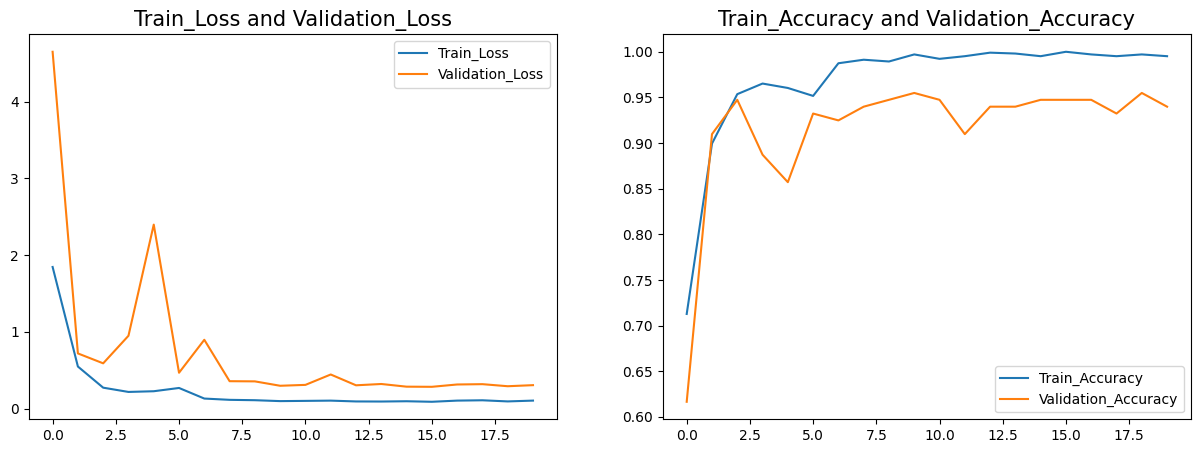

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(history_mobilenet_v2['loss'],label='Train_Loss')
plt.plot(history_mobilenet_v2['val_loss'],label='Validation_Loss')
plt.title('Train_Loss and Validation_Loss',fontsize=15)
plt.legend()


plt.subplot(1,2,2)
plt.plot(history_mobilenet_v2['accuracy'],label='Train_Accuracy')
plt.plot(history_mobilenet_v2['val_accuracy'],label='Validation_Accuracy')
plt.title('Train_Accuracy and Validation_Accuracy',fontsize=15)
plt.legend()
plt.show()

**Model Accuracy**

In [ ]:
x_test=[]
y_test=[]
y_pred=[]

for images, labels in test_data:
    x_test.extend(images.numpy())
    y_test.extend(labels.numpy())


predictions=model.predict(np.array(x_test))
for i in predictions:
    y_pred.append(np.argmax(i))

4/4 [==============================] - 1s 60ms/step


**Accuracy Score of Model on Test Dataset**

In [1]:
model_1_accuracy=accuracy_score(y_test, y_pred)*100
accuracy_score(y_test, y_pred)*100

NameError: ignored

In [ ]:
class_names =train_data.class_names
print(class_names)

['angular_leaf_spot', 'bean_rust', 'healthy']


**Delivarable_2 : Show a few examples of the predicted output**

**Showing Examples of Predicted Output**

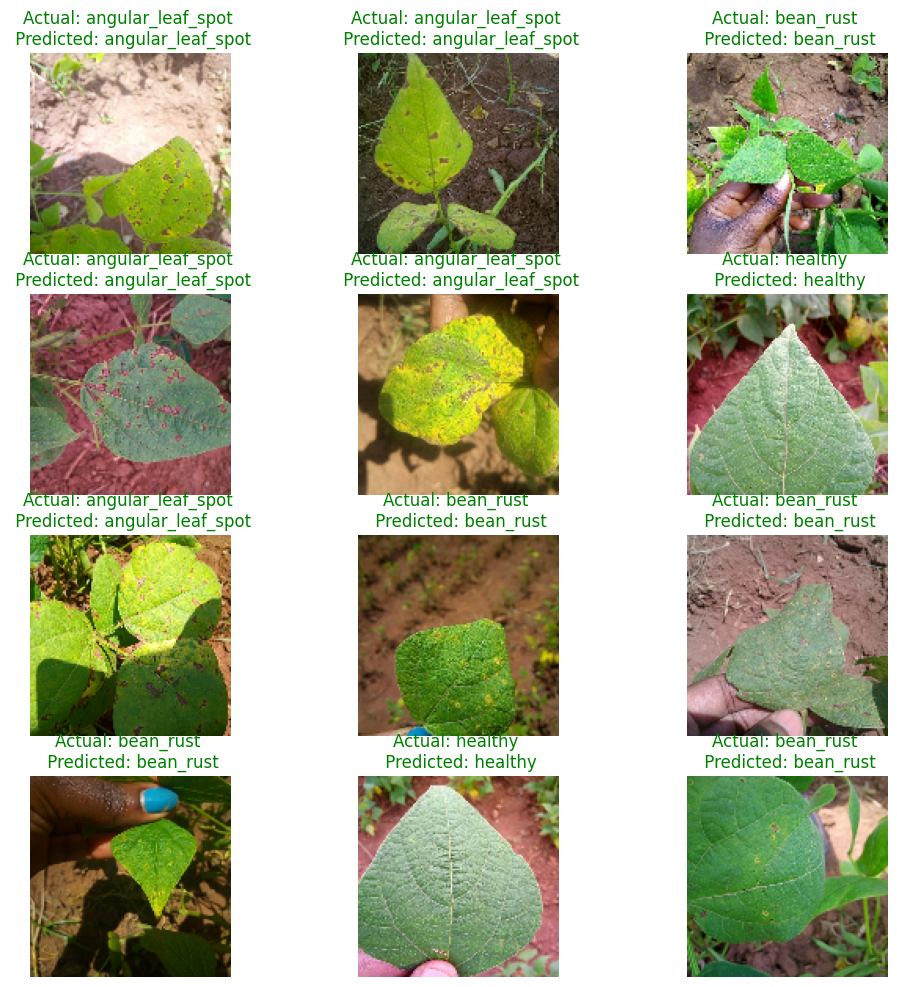

In [ ]:
plt.figure(figsize=(12, 12))

for i in range(12):
    ax = plt.subplot(4, 3, i + 1)
    plt.imshow(x_test[i].astype("uint8"))
    actual_label = class_names[y_test[i]]
    predicted_label = class_names[y_pred[i]]

    # Check if the actual and predicted labels are the same
    if actual_label == predicted_label:
        label_color = 'green'
    else:
        label_color = 'red'

    plt.title(f'Actual: {actual_label} \n Predicted: {predicted_label}', color=label_color)
    plt.axis("off")

plt.show()

**F-1, Precision, Recall Scores - Macro**

In [ ]:

f1_score_value = f1_score(y_pred, y_test, average="macro")
precision_score_value = precision_score(y_pred, y_test, average="macro")
recall_score_value = recall_score(y_pred, y_test, average="macro")

# Print the Results
print(f"F1-Score:{f1_score_value}")
print(f"Precision:{precision_score_value}")
print(f"Recall:{recall_score_value}")

F1-Score:0.9229556097372189
Precision:0.9219269102990033
Recall:0.9252525252525253


In [ ]:
y_test_labels=list(map(lambda e: class_names[e], y_test))

In [ ]:
y_test_labels[:5]

['angular_leaf_spot',
 'angular_leaf_spot',
 'bean_rust',
 'angular_leaf_spot',
 'angular_leaf_spot']

In [ ]:
y_pred_labels=list(map(lambda e: class_names[e], y_pred))

In [ ]:
y_pred_labels[:5]

['angular_leaf_spot',
 'angular_leaf_spot',
 'bean_rust',
 'angular_leaf_spot',
 'angular_leaf_spot']

**Classification Report**

In [ ]:
print("Classification_Report")
print("-----------------------")
print(classification_report(y_test_labels,y_pred_labels))

Classification_Report
-----------------------
                   precision    recall  f1-score   support

angular_leaf_spot       0.91      0.93      0.92        43
        bean_rust       0.87      0.91      0.89        43
          healthy       1.00      0.93      0.96        42

         accuracy                           0.92       128
        macro avg       0.93      0.92      0.92       128
     weighted avg       0.92      0.92      0.92       128



**Delivarable_3 : Display the results of the prediction results using a confusion matrix**

**Displaying Prediction Results using Confusion Matrix**

Confusion_Matrix
----------------------


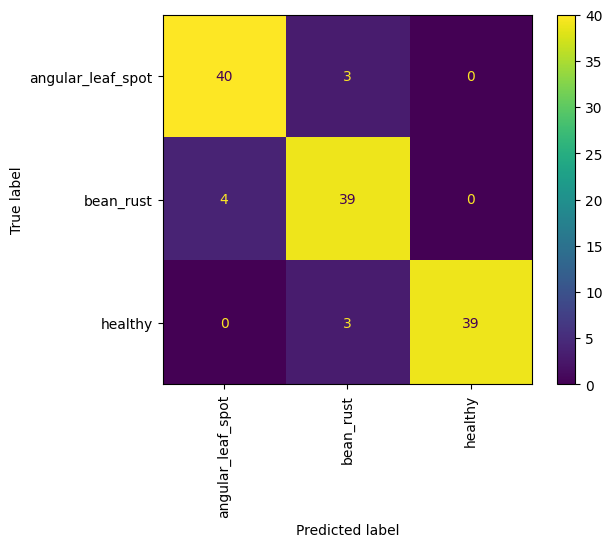

In [ ]:
print("Confusion_Matrix")
print("----------------------")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=class_names, xticks_rotation="vertical")
plt.show()

**Deliverable_4 : Choose one of the above examples (i.e. Tensorflow or Huggingface or Kaggle) and implement a 2 different models on the same test set**

**Model - 2**

**Data Preprocessing and Data Analysis**

In [ ]:
train_directory="/content/drive/MyDrive/TME_6015/Assignment_2/Beans/train"
batch_size = 32
img_height = 128
img_width = 128
train_data = tf.keras.utils.image_dataset_from_directory(train_directory,
                                                         validation_split=None,
                                                         seed=123,
                                                         image_size=(img_height, img_width),
                                                         batch_size=batch_size)

Found 1034 files belonging to 3 classes.


In [ ]:
validation_directory="/content/drive/MyDrive/TME_6015/Assignment_2/Beans/validation"
batch_size = 32
img_height = 128
img_width = 128
validation_data = tf.keras.utils.image_dataset_from_directory(validation_directory,
                                                         validation_split=None,
                                                         seed=123,
                                                         image_size=(img_height, img_width),
                                                         batch_size=batch_size)

Found 133 files belonging to 3 classes.


In [ ]:
test_directory="/content/drive/MyDrive/TME_6015/Assignment_2/Beans/test"
batch_size = 32
img_height = 128
img_width = 128
test_data = tf.keras.utils.image_dataset_from_directory(test_directory,
                                                         validation_split=None,
                                                         seed=123,
                                                         image_size=(img_height, img_width),
                                                         batch_size=batch_size)

Found 128 files belonging to 3 classes.


**Create a Model**

In [ ]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [ ]:
model_handle = "https://www.kaggle.com/models/google/mobilenet-v1/frameworks/TensorFlow2/variations/025-128-classification/versions/2"

feature_extractor = hub.KerasLayer(model_handle,
                                   trainable=True)
num_class = 3
model = tf.keras.Sequential(
    [
        normalization_layer,
        feature_extractor,
        tf.keras.layers.Dense(num_class, activation="softmax")
    ]
)
model.build([None, 128, 128, 3])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 keras_layer_2 (KerasLayer)  (None, 1001)              475801    
                                                                 
 dense_2 (Dense)             (None, 3)                 3006      
                                                                 
Total params: 478807 (1.83 MB)
Trainable params: 473335 (1.81 MB)
Non-trainable params: 5472 (21.38 KB)
_________________________________________________________________


**Compile and Train the Model**

In [ ]:
# Compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"]
             )

In [ ]:
# Callbacks--> Stop training automatically once the model performance stop improving
learning_rate_reduction=tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",patience=2,factor=0.5, min_lr=0.00001,verbose =1)
Early_Stopping= tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=5, restore_best_weights=True)

In [ ]:
# Fit the model
history1= model.fit(train_data, epochs=20, validation_data= validation_data,callbacks=[Early_Stopping,learning_rate_reduction], verbose=1)

Epoch 1/20
33/33 [==============================] - 17s 287ms/step - loss: 1.3040 - accuracy: 0.7234 - val_loss: 2.5816 - val_accuracy: 0.6241 - lr: 0.0010
Epoch 2/20
33/33 [==============================] - 10s 273ms/step - loss: 0.5013 - accuracy: 0.8956 - val_loss: 1.0441 - val_accuracy: 0.7519 - lr: 0.0010
Epoch 3/20
33/33 [==============================] - 10s 282ms/step - loss: 0.3101 - accuracy: 0.9507 - val_loss: 0.7750 - val_accuracy: 0.8571 - lr: 0.0010
Epoch 4/20
33/33 [==============================] - 10s 286ms/step - loss: 0.2403 - accuracy: 0.9662 - val_loss: 5.4004 - val_accuracy: 0.5263 - lr: 0.0010
Epoch 5/20
33/33 [==============================] - ETA: 0s - loss: 0.3296 - accuracy: 0.9545
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
33/33 [==============================] - 10s 288ms/step - loss: 0.3296 - accuracy: 0.9545 - val_loss: 2.0053 - val_accuracy: 0.7068 - lr: 0.0010
Epoch 6/20
33/33 [==============================] - 9s 246ms/

**Evaluate the Model**

In [ ]:
loss, accuracy= model.evaluate(test_data)
print(f"loss is:{loss}")
print(f"accuacy is:{accuracy}")

4/4 [==============================] - 1s 50ms/step - loss: 0.4261 - accuracy: 0.9609
loss is:0.4261464476585388
accuacy is:0.9609375


In [ ]:
history_mobilenet_v1= pd.DataFrame(history1.history)
history_mobilenet_v1.head()

loss  accuracy  val_loss  val_accuracy     lr
0  1.303951  0.723404  2.581554      0.624060  0.001
1  0.501292  0.895551  1.044106      0.751880  0.001
2  0.310077  0.950677  0.775046      0.857143  0.001
3  0.240340  0.966151  5.400447      0.526316  0.001
4  0.329607  0.954545  2.005278      0.706767  0.001

**Plot Training History**

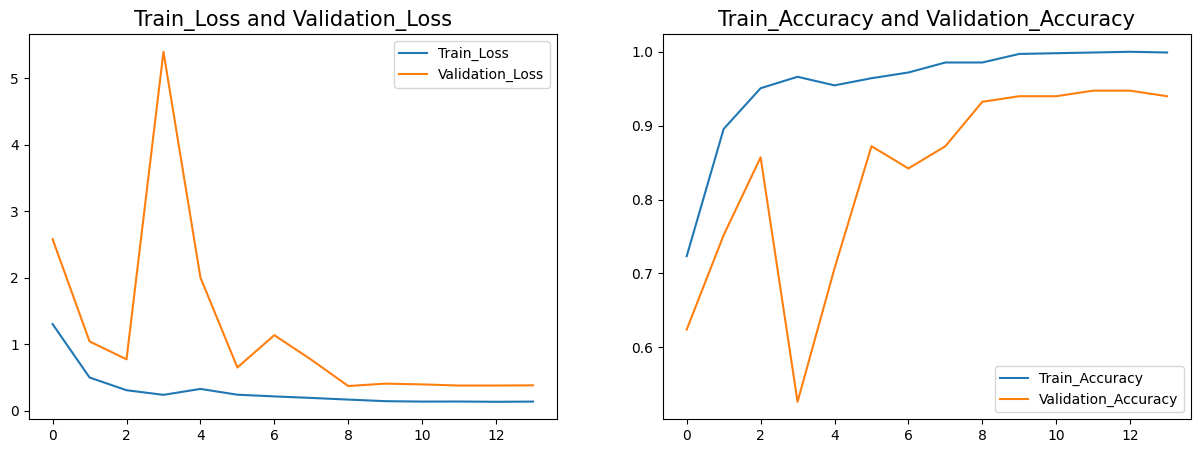

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(history_mobilenet_v1['loss'],label='Train_Loss')
plt.plot(history_mobilenet_v1['val_loss'],label='Validation_Loss')
plt.title('Train_Loss and Validation_Loss',fontsize=15)
plt.legend()


plt.subplot(1,2,2)
plt.plot(history_mobilenet_v1['accuracy'],label='Train_Accuracy')
plt.plot(history_mobilenet_v1['val_accuracy'],label='Validation_Accuracy')
plt.title('Train_Accuracy and Validation_Accuracy',fontsize=15)
plt.legend()
plt.show()

**Model Accuracy**

In [ ]:
x_test=[]
y_test=[]
y_pred=[]

for images, labels in test_data:
    x_test.extend(images.numpy())
    y_test.extend(labels.numpy())


predictions=model.predict(np.array(x_test))
for i in predictions:
    y_pred.append(np.argmax(i))

4/4 [==============================] - 0s 43ms/step


**Accuracy Score of Model on Test Dataset**

In [ ]:
model_2_accuracy=accuracy_score(y_test, y_pred)*100
accuracy_score(y_test, y_pred)*100

In [ ]:
class_names =train_data.class_names
print(class_names)

['angular_leaf_spot', 'bean_rust', 'healthy']


**Delivarable_2 : Show a few examples of the predicted output**

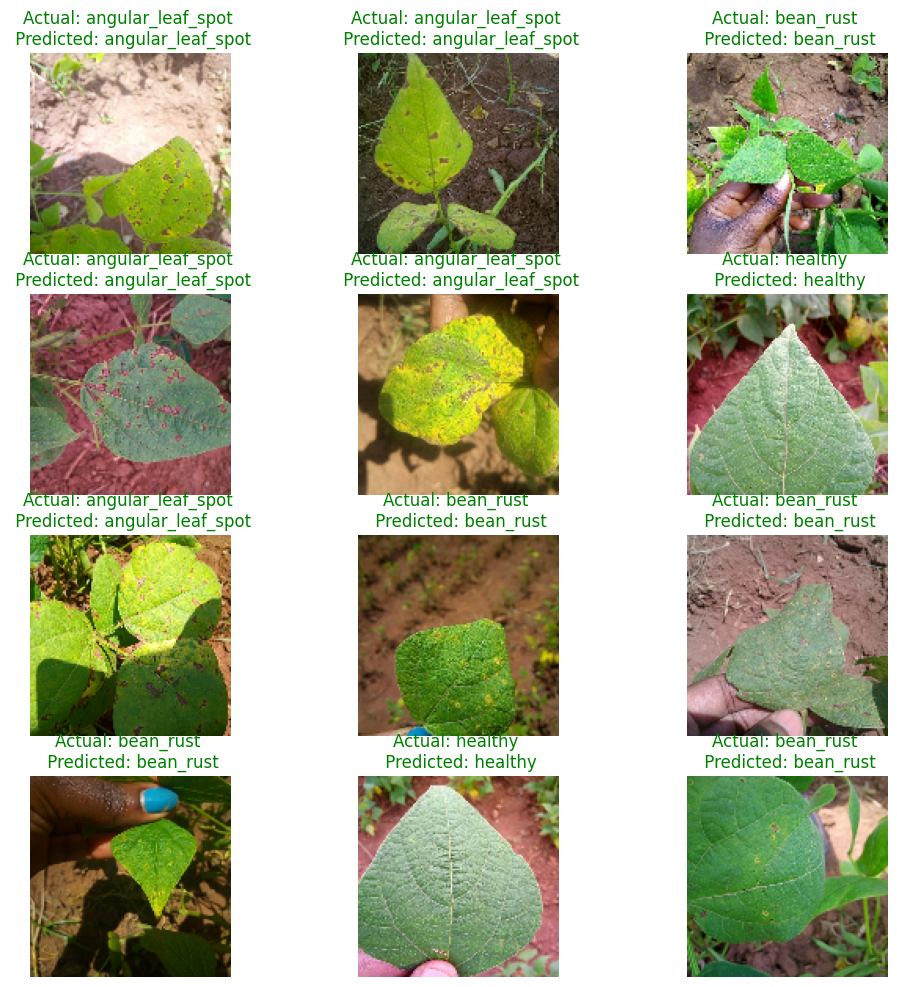

In [ ]:
plt.figure(figsize=(12, 12))

for i in range(12):
    ax = plt.subplot(4, 3, i + 1)
    plt.imshow(x_test[i].astype("uint8"))
    actual_label = class_names[y_test[i]]
    predicted_label = class_names[y_pred[i]]

    # Check if the actual and predicted labels are the same
    if actual_label == predicted_label:
        label_color = 'green'
    else:
        label_color = 'red'

    plt.title(f'Actual: {actual_label} \n Predicted: {predicted_label}', color=label_color)
    plt.axis("off")

plt.show()

**F-1, Precision, Recall Scores - Macro**

In [ ]:
f1_score_value = f1_score(y_pred, y_test, average="macro")
precision_score_value = precision_score(y_pred, y_test, average="macro")
recall_score_value = recall_score(y_pred, y_test, average="macro")

# Print the Results
print(f"F1-Score:{f1_score_value}")
print(f"Precision:{precision_score_value}")
print(f"Recall:{recall_score_value}")

F1-Score:0.9606734878568002
Precision:0.9612403100775193
Recall:0.9613636363636364


In [ ]:
y_test_labels=list(map(lambda e: class_names[e], y_test))

In [ ]:
y_test_labels[:5]

['angular_leaf_spot',
 'angular_leaf_spot',
 'bean_rust',
 'angular_leaf_spot',
 'angular_leaf_spot']

In [ ]:
y_pred_labels=list(map(lambda e: class_names[e], y_pred))

In [ ]:
y_pred_labels[:5]

['angular_leaf_spot',
 'angular_leaf_spot',
 'bean_rust',
 'angular_leaf_spot',
 'angular_leaf_spot']

**Classification Report**

In [ ]:
print("Classification_Report")
print("-----------------------")
print(classification_report(y_test_labels,y_pred_labels))

Classification_Report
-----------------------
                   precision    recall  f1-score   support

angular_leaf_spot       0.95      0.98      0.97        43
        bean_rust       0.97      0.91      0.94        43
          healthy       0.95      1.00      0.98        42

         accuracy                           0.96       128
        macro avg       0.96      0.96      0.96       128
     weighted avg       0.96      0.96      0.96       128



**Delivarable_3 : Display the results of the prediction results using a confusion matrix**

**Displaying Prediction Results using Confusion Matrix**

Confusion_Matrix
----------------------


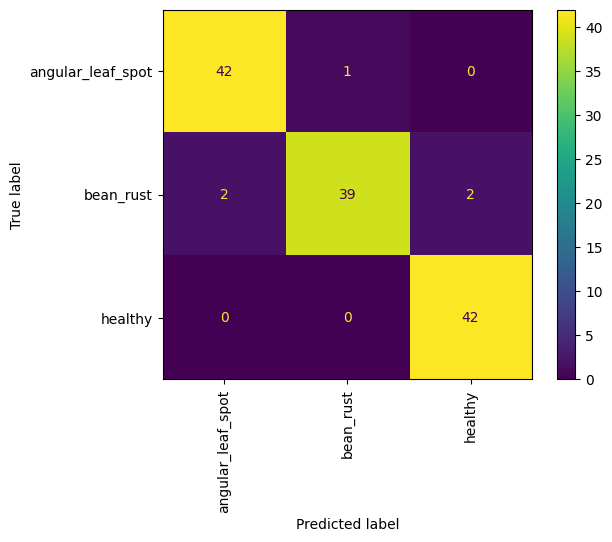

In [ ]:
print("Confusion_Matrix")
print("----------------------")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=class_names, xticks_rotation="vertical")
plt.show()

**Deliverable_5 : Compare the results between the models**

**Comparing Results between two Models - MobileNet V1 vs V2**

In [2]:
print(f"Mobile V2 Accuracy score : {model_1_accuracy}")
print(f"Mobile V1 Accuracy score : {model_2_accuracy}")

NameError: ignored